/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi: 0.95
Presisi: 0.9502448865452221
Recall: 0.95
F1-score: 0.9498488054158158
ROC AUC Score: 0.9933282972750089

Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.95      0.93      0.94       196
           2       0.95      0.97      0.96       294
           3       0.86      1.00      0.92         6
           4       1.00      0.75      0.86         4

    accuracy                           0.95       500
   macro avg       0.94      0.91      0.92       500
weighted avg       0.95      0.95      0.95       500

Matriks Kebingungan:
 [[182  14   0   0]
 [ 10 284   0   0]
 [  0   0   6   0]
 [  0   0   1   3]]


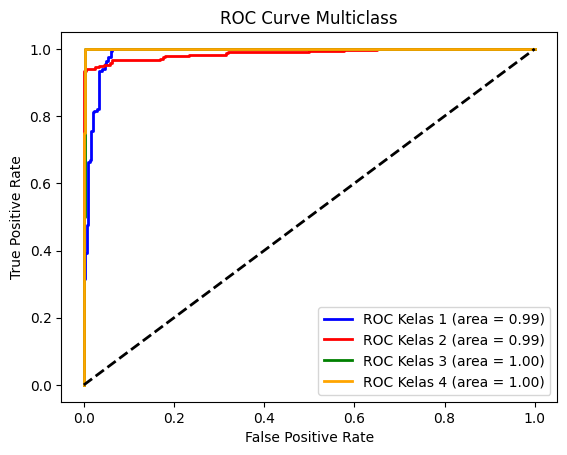

In [2]:
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
import numpy as np   # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk plotting grafik
import seaborn as sns  # Untuk visualisasi data yang lebih menarik

# Import library scikit-learn untuk pemodelan dan evaluasi
from sklearn.model_selection import train_test_split  # Untuk membagi dataset
from sklearn.linear_model import LogisticRegression   # Untuk model regresi logistik
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score  # Untuk evaluasi model

# Load dataset dari file CSV
data = pd.read_csv('/content/sample_data/CitarumWater.csv')

# Menampilkan 5 baris pertama dataset untuk memahami struktur data
data.head()

# Menghapus kolom yang tidak diperlukan dalam pemodelan
# 'No', 'NamaSungai', 'TitikPantau', 'Waktu', dan 'O2' dianggap tidak relevan untuk prediksi
data_cleaned = data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'O2'])

# Mengubah data pada kolom 'Temp' menjadi numerik dengan menghapus simbol '°C'
data_cleaned['Temp'] = data_cleaned['Temp'].str.replace('°C', '').astype(float)

# Mengonversi semua kolom menjadi tipe data numerik (jika belum)
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang memiliki nilai kosong (NaN)
data_cleaned = data_cleaned.dropna()

# Menampilkan dataset yang sudah dibersihkan
data_cleaned.head()

# Memisahkan fitur (X) dan target (y)
X = data_cleaned.drop(columns=['Class'])  # Fitur input
y = data_cleaned['Class']                 # Target output

# Membagi data menjadi set pelatihan dan pengujian (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Membuat instance model regresi logistik dengan parameter default
logistic_model = LogisticRegression(max_iter=1000)  # max_iter ditingkatkan agar konvergen

# Melatih model menggunakan data pelatihan
logistic_model.fit(X_train, y_train)

# Membuat prediksi pada data pengujian
y_pred = logistic_model.predict(X_test)  # Prediksi kelas
y_pred_proba = logistic_model.predict_proba(X_test)  # Prediksi probabilitas untuk setiap kelas

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)  # Akurasi
precision = precision_score(y_test, y_pred, average='weighted')  # Presisi rata-rata tertimbang
recall = recall_score(y_test, y_pred, average='weighted')        # Recall rata-rata tertimbang
f1 = f1_score(y_test, y_pred, average='weighted')                # F1-score rata-rata tertimbang

# Menampilkan laporan klasifikasi lengkap
class_report = classification_report(y_test, y_pred)

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)

# Menghitung skor AUC-ROC (untuk setiap kelas jika multiclass)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nLaporan Klasifikasi:\n", class_report)
print("Matriks Kebingungan:\n", conf_matrix)

# Menggambar ROC Curve untuk setiap kelas (jika multiclass)
# Membuat binarizer untuk label multiclass
from sklearn.preprocessing import label_binarize

# Binarisasi label
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Menghitung ROC Curve dan ROC AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc_dict[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure()
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC Kelas {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc_dict[i]))

# Menggambar garis diagonal sebagai baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Menetapkan judul dan label sumbu
plt.title('ROC Curve Multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Menampilkan legenda
plt.legend(loc='lower right')

# Menampilkan plot
plt.show()
